# Visualisation
# Lab 9 - Time Series
This tutorial will look at convolutions and the FFT.
Among other things, You will learn how to smooth time series using a convolution and how to apply the FFT to identify repeating patterns.

# Tutorial Section

In [2]:
# Here, we import all packages we need.

# This is a package for handling and manipulating data.
import pandas as pd

# This is the standard package for plotting.
from matplotlib import pyplot as plt 

# Seaborn is build on matplotlib.
# It is more comfortable to use than pure matplotlib.
import seaborn as sns

# Numpy helps us handling arrays of numbers
import numpy as np

# We use this function to calculate the fft
from numpy.fft import fft, ifft

# This shifts the output of the fft so that zero frequency is at the centre
from numpy.fft import fftshift

# The inverse of fftshift 
from numpy.fft import ifftshift


# Convolutions

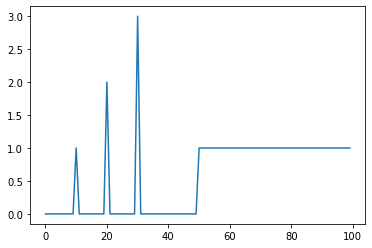

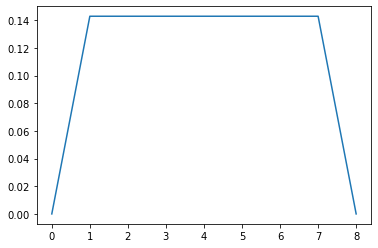

In [3]:
# We will create a vector of zeros
v= np.zeros(100)

# We set some parts to other values
v[10]=1
v[20]=2
v[30]=3
v[50:]=1

# We create a vector of x values to plot 'v' against
xv = np.arange(v.size)

#lets have a look at it.
plt.plot(xv,v)
plt.show()


# we create another vector; a box kernel
windowSize = 9
boxSize = 7
k = np.zeros(windowSize)
k[windowSize//2 - boxSize//2 : windowSize//2 + boxSize//2 +1] = 1.0/boxSize
plt.plot(k)

We will now convolve the two.

result size: 92


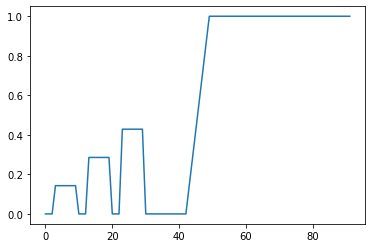

In [4]:
result = np.convolve(v,k, 'valid')
print('result size:', result.size)
plt.plot(result)

Since we are using the `valid` mode, the resulting vector is shorter due to the boundary regions where there is no overlap. When convolving to vectors with length `N` and `M` the result will be `max(M, N) - min(M, N) + 1` long. We can still overlay 'v' and 'result' by using the correct x value to plot against.

There are other modes of convolution implemented by the `convolve` function that behave differently, see [link](https://numpy.org/doc/stable/reference/generated/numpy.convolve.html).

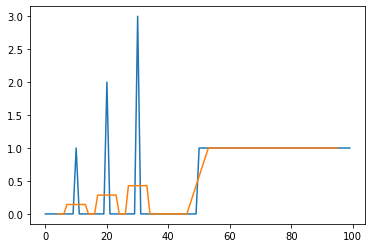

In [5]:
# we want to shift by half the difference
shift= (v.size - result.size ) //2

plt.plot(xv,v)
plt.plot(xv[shift:-shift],result)

## Loading a Time Series and Displaying it

In [6]:
flights = sns.load_dataset("flights")
flights

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121
...,...,...,...
139,1960,Aug,606
140,1960,Sep,508
141,1960,Oct,461
142,1960,Nov,390


Text(0, 0.5, 'Passengers')

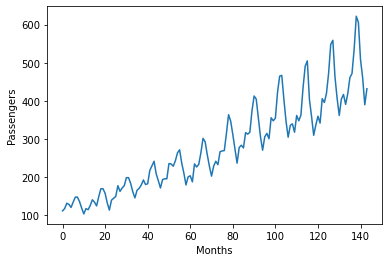

In [7]:
passengers = np.array(flights['passengers'])
months = np.arange(passengers.size) 
sns.lineplot(x=months, y=passengers)
plt.xlabel('Months')
plt.ylabel('Passengers')


# Applying the FFT 

In [14]:
# We apply the FFT
passengersFFT_ = fft(passengers)
type(passengersFFT_)

numpy.ndarray

Let us look at the results given by the numpy fft function.

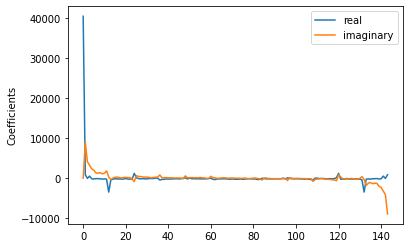

In [8]:
# We will use this as x-axis to plot our coefficients against
freqs=np.arange(passengers.size)

# The result is an array of complex numbers
# We will plot the real and imagnary components seperately
sns.lineplot(x=freqs, y=passengersFFT_.real, label = 'real')
sns.lineplot(x=freqs, y=passengersFFT_.imag, label = 'imaginary')
plt.ylabel('Coefficients')
plt.legend()

The function puts the low frequencies to the left and right and the high frequencies in the centre.
We want to have the low frequencies in the centre. We will use the `fftshift` function to achieve this.

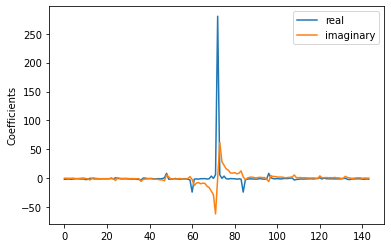

In [9]:
# We shift the results
passengersFFT = fftshift(passengersFFT_)

# We normalise the results to make the coefficients independent of the length of the sequence
passengersFFT = passengersFFT/passengers.size

# Lets plot the results again
sns.lineplot(x=freqs, y=passengersFFT.real, label = 'real')
sns.lineplot(x=freqs, y=passengersFFT.imag, label = 'imaginary')
plt.ylabel('Coefficients')
plt.legend()

Now, we will create a meaningful x-axis for our plot that tells us what frequency the values correspond to.
We will first compute the frequency as repetitions per sequence length. So, a frequency of 1 would correspond to a sinusoid that oscillates up and down once over the the entire length of the line series, in this case once per 12 years. 

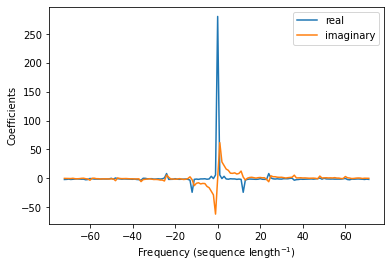

In [10]:
# We will use this as x-axis to plot our coefficients against
freqs = np.arange(passengers.size)

# We know that zero frequency is in the centre, so we have to subtract half the length of the array
freqs = freqs - (passengers.size)//2

# Lets plot the results again
sns.lineplot(x=freqs, y=passengersFFT.real, label = 'real')
sns.lineplot(x=freqs, y=passengersFFT.imag, label = 'imaginary')
plt.ylabel('Coefficients')
# The x-axis now corresponds to the frequency as repetitions per sequence length
plt.xlabel('Frequency (sequence length$^{-1}$)')
plt.legend()

To compute the frequency as oscillations per year, we can devide by the number of years in the time series.

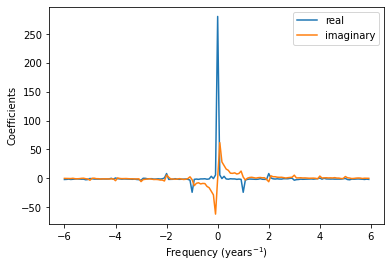

In [11]:
# We have 12 years in the time series.
freqsYears = freqs/12.0

# Lets plot the results again
sns.lineplot(x=freqsYears, y=passengersFFT.real, label = 'real')
sns.lineplot(x=freqsYears, y=passengersFFT.imag, label = 'imaginary')
plt.ylabel('Coefficients')
# The x-axis now correspods to the frequency as repetitions per sequence length
plt.xlabel('Frequency (years$^{-1}$)')
plt.legend()

We know that the negative frequencies contain redundant information, so let's focus on the positive side alone.

(0.0, 6.0)

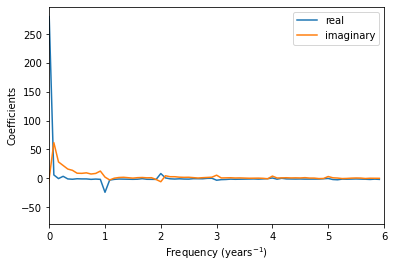

In [12]:
# Lets plot the results again
sns.lineplot(x=freqsYears, y=passengersFFT.real, label = 'real')
sns.lineplot(x=freqsYears, y=passengersFFT.imag, label = 'imaginary')
plt.ylabel('Coefficients')
plt.xlabel('Frequency (years$^{-1}$)')
plt.legend()
plt.xlim(0,6)


## Computing the Amplitude and Phase for each Frequency 

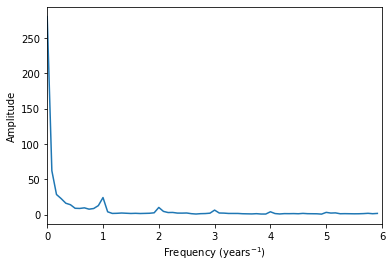

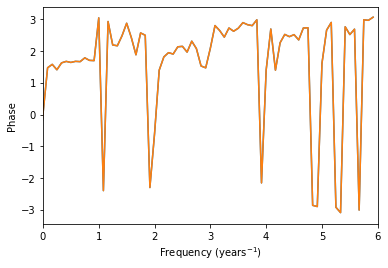

In [13]:
# The arctan2 function is a convenient way to compute the angle/phase
phase = np.arctan2(passengersFFT.imag,passengersFFT.real)

# The abs function is a convenient way to compute length/amplitude
amplitude = np.abs(passengersFFT)

# Lets plot both
sns.lineplot(x=freqsYears, y=amplitude)
plt.ylabel('Amplitude')
plt.xlabel('Frequency (years$^{-1}$)')
plt.xlim(0,6)
plt.show()

sns.lineplot(x=freqsYears, y=phase)
sns.lineplot(x=freqsYears, y=phase)
plt.ylabel('Phase')
plt.xlabel('Frequency (years$^{-1}$)')
plt.xlim(0,6)
plt.show()

# Applying the FFT to Kernel Functions

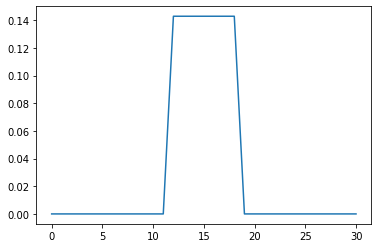

In [14]:
# We create a box kernel 
windowSize = 31
boxSize = 7
k = np.zeros(windowSize)
k[windowSize//2 - boxSize//2 : windowSize//2 + boxSize//2 +1] = 1.0/boxSize
plt.plot(k)

When we naively apply the fft to a kernel function, we get an unexpected result. **This is NOT the way to compute the FFT of a kernel!**

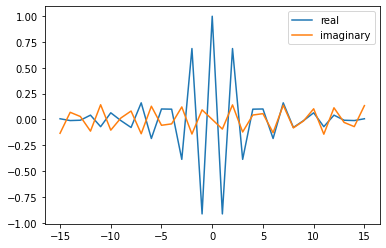

In [15]:
kFFT = fftshift(fft(k))

# We will use this as x-axis to plot our coefficients against
freqs = np.arange(k.size)

# We know that zero frequency is in the centre, so we have to subtract half the length of the array
freqs = freqs - (k.size)//2

# Lets plot the results again
sns.lineplot(x=freqs, y=kFFT.real, label = 'real')
sns.lineplot(x=freqs, y=kFFT.imag, label = 'imaginary')
plt.legend()

The reason for this is that we have to let the fft function know that zero is in the centre of our array.
We can effectively achieve this by applying the `ifftshift` function before the fft. If we do this, we get the expected result.
**In the cell below you see the way to compute the FFT of a kernel!**

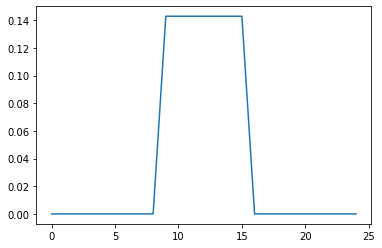

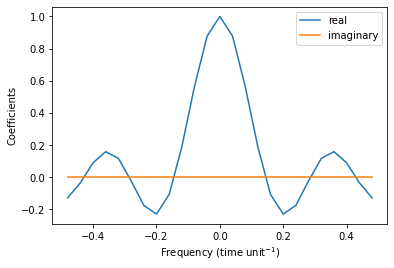

In [16]:
# We create a box kernel 
windowSize = 25
boxSize = 7
k = np.zeros(windowSize)
k[windowSize//2 - boxSize//2 : windowSize//2 + boxSize//2 +1] = 1.0/boxSize
plt.plot(k)
plt.show()


kFFT = fftshift(fft( ifftshift(k) ))
# We will use this as x-axis to plot our coefficients against
freqs = np.arange(k.size)
# We know that zero frequency is in the centre, so we have to subtract half the length of the array
freqs = freqs - (k.size)//2
# We want to compute the frequency as oscilations per time unit, 
# so we have to devide by the length of the kernel 
freqs = freqs / k.size

# Lets plot the results again
sns.lineplot(x=freqs, y=kFFT.real, label = 'real')
sns.lineplot(x=freqs, y=kFFT.imag, label = 'imaginary')
plt.ylabel('Coefficients')
# The x-axis now correspods to the frequency as repetitions per sequence length
plt.xlabel('Frequency (time unit$^{-1}$)')
plt.legend()

How does the window size effect the resulting FFT coefficients?
Using a larger window will result in a higher resolution of FFT coefficients.
See what happens when you change the window size and the box size in the cell above.


---

# Excercises

# Excercise 1
The file `time_series.csv` contains a time series that has been corrupted by two repeating patterns at two different frequencies. Find out what the frequency of the two patterns is in Hz (oscilations per second) and what the length (period) of the patterns is in seconds.

In [17]:
# We read the file
ts=pd.read_csv('time_series.csv')
ts

,time in seconds,signal
0,0,6.087059
1,1,-1.880828
2,2,-1.475326
3,3,-1.350568
4,4,-0.837796
...,...,...
658,658,-0.773316
659,659,-0.265787
660,660,0.125878
661,661,-0.146247


Text(0, 0.5, 'Signal')

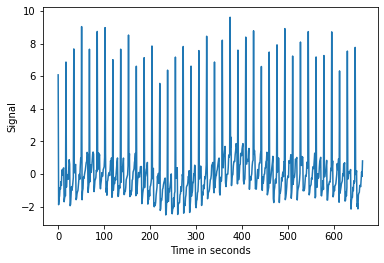

In [18]:
# We extract the signal column and plot it.
signal = ts['signal']

# We extract the time column.
time = ts['time in seconds']

plt.plot(time, signal)
plt.xlabel('Time in seconds')
plt.ylabel('Signal')

# Please implement.

# Excercise 2
Design two box filters, one for each of the patterns, that completly remove the pattern by convolution.
Apply the two filters separately. Then, combine them by applying them successivley. Plot the resulting filtered time series for each separate filter and their combination.

Make another plot overlaying the spectra of the three filtered versions.

In [21]:
# Please Implement.

# Excercise 3
Derive a single combined filter kernel that is equivalent to subsequently applying both box filters.
Apply the FFT to the kernel and plot the resulting coeficients as a function of frequency.
Overlay the resulting real coefficients of the two box filters and the combined filter.

In [25]:
# Please implement.